In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [15]:
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievement 4 - Python\09-24-2020-Instacart Basket Analysis'

In [27]:
df_merged_large_prod = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_merged2.csv'), index_col = False)

In [28]:
df_merged_large_prod.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0_x  order_id  user_id  \
0           0             0               0             0   2539329        1   
1           1             1               1             5   2398795        1   
2           2             2               2            11    473747        1   
3           3             3               3            16   2254736        1   
4           4             4               4            21    431534        1   

  eval_set  order_number  order_dow  order_hour_of_day  ...  product_name  \
0    prior             1          2                  8  ...          Soda   
1    prior             2          3                  7  ...          Soda   
2    prior             3          3                 12  ...          Soda   
3    prior             4          4                  7  ...          Soda   
4    prior             5          4                 15  ...          Soda   

   aisle_id  department_id  prices     busiest_day  \
0        77              7     9.0  Regularly busy   
1        77              7     9.0  Regularly busy   
2        77              7     9.0  Regularly busy   
3        77              7     9.0      Least busy   
4        77              7     9.0      Least busy   

   two_busiest_and_slowest_days max_order           loyalty_flag  mean_price  \
0                Regularly busy        10  Non-frequent customer    6.101961   
1                  Not busy day        10  Non-frequent customer    6.101961   
2                  Not busy day        10  Non-frequent customer    6.101961   
3                Least busy day        10  Non-frequent customer    6.101961   
4                Least busy day        10  Non-frequent customer    6.101961   

   median_days_since_prior_order  
0                           20.5  
1                           20.5  
2                           20.5  
3                           20.5  
4                           20.5  

[5 rows x 26 columns]

### Bar Charts

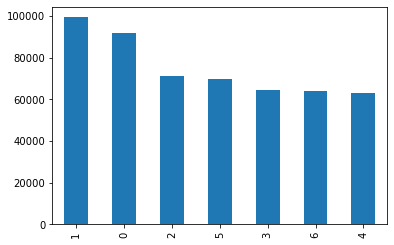

In [29]:
# create plot bar for oder_dow column
df_merged_large_prod['order_dow'].value_counts().plot.bar()

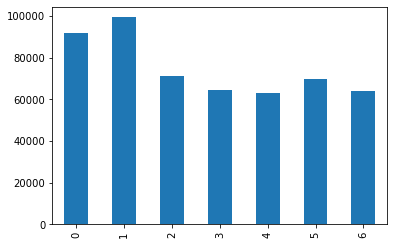

In [30]:
# The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
df_merged_large_prod['order_dow'].value_counts().sort_index().plot.bar()

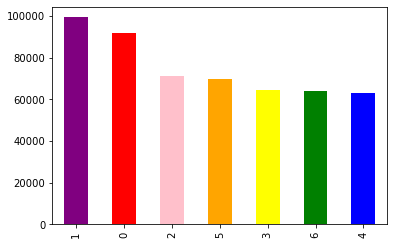

In [31]:
# add color 
df_merged_large_prod['order_dow'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

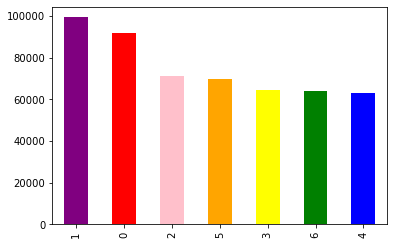

In [32]:
# save the chart within the bar object
bar = df_merged_large_prod['order_dow'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

In [33]:
#  export it outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_orders_dow.png'))

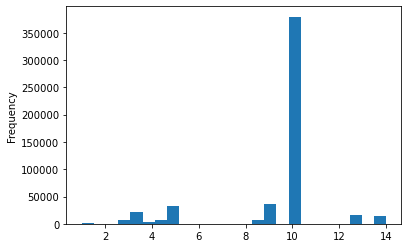

In [34]:
# creating a histogram of the “prices” column
df_merged_large_prod['prices'].plot.hist(bins = 25)

In [36]:
df_merged_large_prod['prices'].describe()

count    524287.000000
mean          9.486958
std           2.355665
min           1.000000
25%          10.300000
50%          10.300000
75%          10.300000
max          14.000000
Name: prices, dtype: float64

In [37]:
df_merged_large_prod['prices'].mean()

9.486958097314314

In [38]:
df_merged_large_prod['prices'].median()

10.3

In [39]:
df_merged_large_prod['prices'].max()

14.0

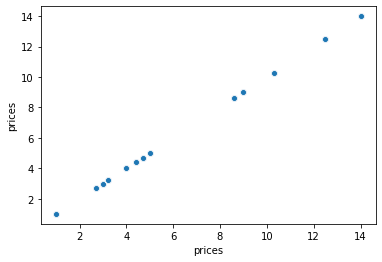

In [40]:
# scatterplot can be created via the following code
sns.scatterplot(x = 'prices', y = 'prices',data = df_merged_large_prod)

In [41]:
# splitting the dataframe into two dataframes at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(df_merged_large_prod)) <= 0.7

In [43]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [44]:
#  the np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced. In the code above, the argument given is the length of your dataframe,
np.random.rand(10) 

array([0.98672121, 0.7817425 , 0.36517019, 0.57783622, 0.13185192,
       0.98977324, 0.25082484, 0.17745625, 0.5538333 , 0.4249113 ])

In [ ]:
# The two dataframes above, big and small, are the samples you’ll create from df_merged_large_prod dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. 

In [45]:
big = df_merged_large_prod[dev]

In [46]:
small = df_merged_large_prod[dev]

In [47]:
# create a list holding true/false values to the test np.random.rant()<=0.7
dev = np.random.rand(len(df_merged_large_prod))<=0.7

In [48]:
# store 70% of the sample in the df big
big = df_merged_large_prod[dev]

In [49]:
# store 30% of the sample in the df small
small = df_merged_large_prod[dev]


In [50]:
len(df_merged_large_prod)

524287

In [51]:
len(big)+len(small)

732394

In [53]:
# reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_dow".
df_2 = small[['order_dow','prices']]


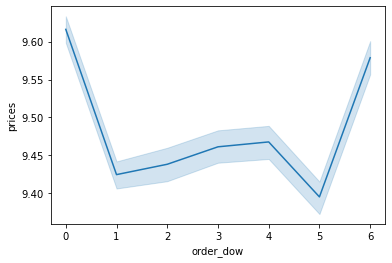

In [54]:
# create a chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [ ]:
# . Earlier on in this Exercise, you learned that using a subset of rows from the bottom or top of a dataframe wasn’t representative. But how do you know for a fact that the new line chart you’ve created is? The best way to check is to compare the line chart of your subset with the line chart of the entire dataframe (or even the big sample). For instance, the line chart of your entire dataframe would look like this:

In [55]:
df4 = df_merged_large_prod[['order_dow','prices']]

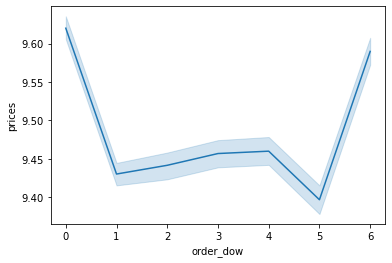

In [56]:
line2 = sns.lineplot(data = df4, x = 'order_dow', y = 'prices')